<a href="https://colab.research.google.com/github/RuchiraAbeywardhane/A03-Neural-Networks/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 01**

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim

The middle layer takes the large input data (3072 values from an image) and reduces it to 100 key features, simplifying the data while keeping important patterns. It uses a sigmoid activation function, which helps the model learn non-linear relationships, like shapes or textures. By doing this, the layer creates a useful representation of the image, making it easier for the network to classify objects in the CIFAR-10 dataset accurately.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.0811
Epoch 2/10, Loss: 1.9100
Epoch 3/10, Loss: 1.8466
Epoch 4/10, Loss: 1.8079
Epoch 5/10, Loss: 1.7793
Epoch 6/10, Loss: 1.7580
Epoch 7/10, Loss: 1.7405
Epoch 8/10, Loss: 1.7259
Epoch 9/10, Loss: 1.7127
Epoch 10/10, Loss: 1.7013


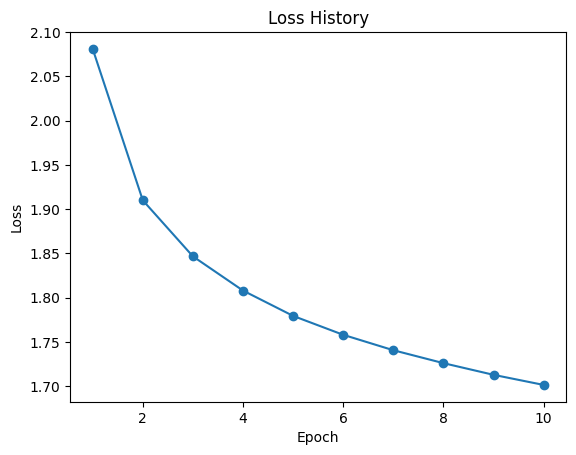

Training Accuracy: 41.21%
Test Accuracy: 40.71%


In [ ]:
if __name__ == '__main__':
    # 1. Dataloading
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ]
    )
    batch_size = 50
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # 2. Define Network Architecture
    class SimpleNet(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(SimpleNet, self).__init__()
            # Define layers
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.sigmoid = nn.Sigmoid()
            self.fc2 = nn.Linear(hidden_size, output_size)

        def forward(self, x):
            x = x.view(x.size(0), -1)  # Flatten input
            x = self.fc1(x)  # First layer
            x = self.sigmoid(x)  # Sigmoid activation
            x = self.fc2(x)  # Output layer
            return x

    # Model parameters
    input_size = 3 * 32 * 32  # CIFAR-10 image size (flattened)
    hidden_size = 100  # Hidden layer size
    output_size = 10  # Number of classes

    # Instantiate model, loss function, and optimizer
    model = SimpleNet(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.0005)  # Weight decay for L2 regularization

    # 3. Training Loop
    num_epochs = 10
    loss_history = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            # Zero gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Accumulate loss
            running_loss += loss.item()

        # Average loss for the epoch
        epoch_loss = running_loss / len(trainloader)
        loss_history.append(epoch_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # 4. Plotting the Loss History
    plt.plot(range(1, num_epochs + 1), loss_history, marker='o')
    plt.title("Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    # 5. Calculate Training Accuracy
    correct_train = 0
    total_train = 0
    with torch.no_grad():
        for inputs, labels in trainloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
    train_acc = 100 * correct_train / total_train
    print(f"Training Accuracy: {train_acc:.2f}%")

    # 6. Calculate Test Accuracy
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    test_acc = 100 * correct_test / total_test
    print(f"Test Accuracy: {test_acc:.2f}%")

# **Question 02**

The LeNet-5 network is designed for the MNIST dataset, which contains grayscale images of handwritten digits. It has two convolutional layers: the first uses 6 filters of size 5×5, and the second uses 16 filters of the same size, both using ReLU activation. After each convolutional layer, there is a 2×2 average pooling layer to reduce the image size. The network also has three fully connected layers with 120, 84, and 10 outputs, where the last layer predicts the digit class (0 to 9). It uses cross-entropy loss to measure how well the predictions match the actual labels and the Adam optimizer to adjust the weights for better accuracy. The model is trained for 10 epochs to improve its performance.

Epoch 1: Train Loss = 0.4138, Train Accuracy = 87.14%
Epoch 2: Train Loss = 0.0836, Train Accuracy = 97.44%
Epoch 3: Train Loss = 0.0564, Train Accuracy = 98.26%
Epoch 4: Train Loss = 0.0448, Train Accuracy = 98.61%
Epoch 5: Train Loss = 0.0357, Train Accuracy = 98.88%
Epoch 6: Train Loss = 0.0291, Train Accuracy = 99.09%
Epoch 7: Train Loss = 0.0255, Train Accuracy = 99.20%
Epoch 8: Train Loss = 0.0209, Train Accuracy = 99.32%
Epoch 9: Train Loss = 0.0187, Train Accuracy = 99.38%
Epoch 10: Train Loss = 0.0172, Train Accuracy = 99.44%
Test Accuracy: 98.96%


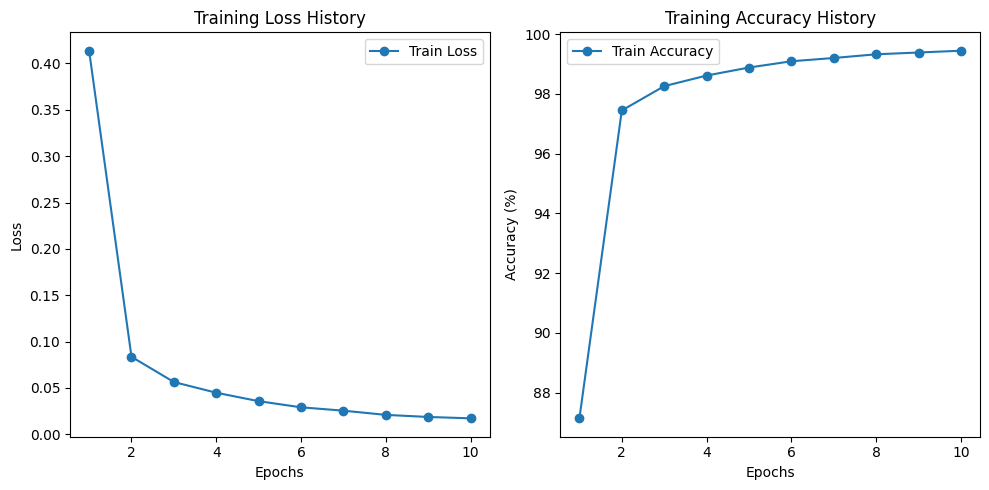

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)     # Input channels: 1, Output channels: 6
        self.pool = nn.AvgPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)    # Input channels: 6, Output channels: 16
        self.fc1 = nn.Linear(16 * 5 * 5, 120)           # Adjust input features based on image size
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)                    # 10 classes for MNIST

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))        # Convolution + Pooling Layer 1
        x = self.pool(torch.relu(self.conv2(x)))        # Convolution + Pooling Layer 2
        x = x.view(-1, 16 * 5 * 5)                      # Flatten the features for the fully connected layers
        x = torch.relu(self.fc1(x))                     # Fully Connected Layer 1
        x = torch.relu(self.fc2(x))                     # Fully Connected Layer 2
        x = self.fc3(x)                                 # Output Layer (logits for 10 classes)
        return x

# Transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),                        # LeNet-5 expects 32x32 images
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))          # Normalize using MNIST mean and std
])

# Load MNIST Dataset
train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('.', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Initialize Model, Loss Function, Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training Function
def train(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for data, target in loader:
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    avg_loss = running_loss / len(loader)
    return avg_loss, accuracy

# Testing Function
def test(model, loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Training Loop
train_losses = []
train_accuracies = []
for epoch in range(1, 11):
    train_loss, train_accuracy = train(model, train_loader, optimizer, criterion, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Train Accuracy = {train_accuracy:.2f}%")

# Test Model
test_accuracy = test(model, test_loader, device)
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plot Accuracy and Loss History
epochs = list(range(1, 11))

# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy History')
plt.legend()

plt.tight_layout()
plt.show()


# **Question 03**

Download complete!
Extracting dataset...
Extraction complete!


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


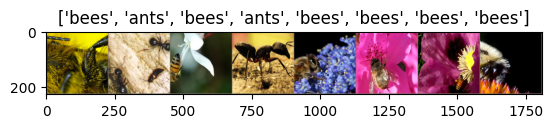

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import urllib.request
import zipfile

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the URL and download location
url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
filename = "hymenoptera_data.zip"

# Download the file
print("Downloading dataset...")
urllib.request.urlretrieve(url, filename)
print("Download complete!")

# Extract the zip file
extract_dir = "./hymenoptera_data"

print("Extracting dataset...")
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("Extraction complete!")

# Clean up
os.remove(filename)  # Optional: remove the zip file after extraction

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './hymenoptera_data/hymenoptera_data'  # Correct the path to the hymenoptera dataset
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ['train', 'val']
}
dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8, shuffle=True, num_workers=4)
    for x in ['train', 'val']
}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [2]:
# Load the pre-trained ResNet-18 model
resnet18 = models.resnet18(pretrained=True)
resnet18 = resnet18.to(device)

# Define a function for training the model
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward pass + optimize only in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model

# visualize_model
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 144MB/s]


**Finetuning the ConvNet**

The goal of fine-tuning is to adapt a pre-trained network to a specific task by slightly adjusting its weights. This process allows the model to learn features relevant to the Hymenoptera dataset while still leveraging the knowledge it gained during its initial training on ImageNet.

Fine-tuning the pre-trained model
Epoch 0/9
----------
train Loss: 0.5492 Acc: 0.6762
val Loss: 0.2165 Acc: 0.9346

Epoch 1/9
----------
train Loss: 0.3103 Acc: 0.8607
val Loss: 0.1976 Acc: 0.9346

Epoch 2/9
----------
train Loss: 0.3024 Acc: 0.8648
val Loss: 0.1582 Acc: 0.9346

Epoch 3/9
----------
train Loss: 0.2652 Acc: 0.8811
val Loss: 0.1343 Acc: 0.9608

Epoch 4/9
----------
train Loss: 0.2565 Acc: 0.9016
val Loss: 0.2008 Acc: 0.9020

Epoch 5/9
----------
train Loss: 0.1719 Acc: 0.9344
val Loss: 0.2037 Acc: 0.9216

Epoch 6/9
----------
train Loss: 0.2219 Acc: 0.9180
val Loss: 0.2297 Acc: 0.9281

Epoch 7/9
----------
train Loss: 0.1973 Acc: 0.9180
val Loss: 0.2014 Acc: 0.9412

Epoch 8/9
----------
train Loss: 0.1533 Acc: 0.9426
val Loss: 0.2093 Acc: 0.9281

Epoch 9/9
----------
train Loss: 0.1309 Acc: 0.9385
val Loss: 0.2018 Acc: 0.9150

Training complete in 14m 17s
Best val Acc: 0.960784


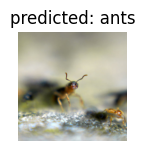

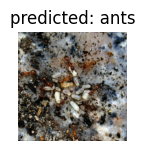

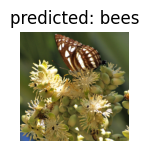

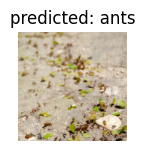

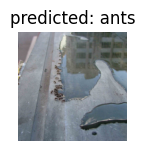

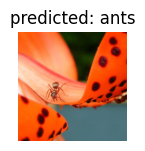

In [3]:
# (a) Fine-tuning the pre-trained model
print("Fine-tuning the pre-trained model")
# Modify the final layer to match the number of classes in our dataset
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, len(class_names))
resnet18 = resnet18.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

# Train and evaluate the model
resnet18 = train_model(resnet18, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

# Visualize the model predictions
visualize_model(resnet18)

**ConvNet as fixed feature extractor**

The aim of this method is to utilize the pre-trained ResNet-18 model as a fixed feature extractor, with only the final fully connected layer being trained. The weights of the earlier layers are kept frozen, allowing them to exclusively focus on feature extraction.


Using the pre-trained model as a feature extractor
Epoch 0/9
----------
train Loss: 0.6463 Acc: 0.6270
val Loss: 0.3258 Acc: 0.8954

Epoch 1/9
----------
train Loss: 0.4794 Acc: 0.7869
val Loss: 0.2133 Acc: 0.9477

Epoch 2/9
----------
train Loss: 0.3765 Acc: 0.8197
val Loss: 0.2543 Acc: 0.8889

Epoch 3/9
----------
train Loss: 0.3608 Acc: 0.8484
val Loss: 0.1723 Acc: 0.9608

Epoch 4/9
----------
train Loss: 0.2237 Acc: 0.9180
val Loss: 0.1779 Acc: 0.9477

Epoch 5/9
----------
train Loss: 0.2642 Acc: 0.8811
val Loss: 0.1734 Acc: 0.9477

Epoch 6/9
----------
train Loss: 0.2210 Acc: 0.9344
val Loss: 0.1808 Acc: 0.9412

Epoch 7/9
----------
train Loss: 0.3608 Acc: 0.8361
val Loss: 0.1763 Acc: 0.9412

Epoch 8/9
----------
train Loss: 0.2179 Acc: 0.9180
val Loss: 0.1774 Acc: 0.9412

Epoch 9/9
----------
train Loss: 0.2101 Acc: 0.9221
val Loss: 0.1772 Acc: 0.9412

Training complete in 7m 2s
Best val Acc: 0.960784


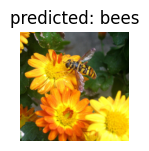

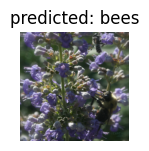

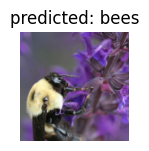

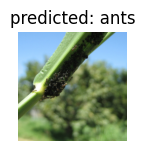

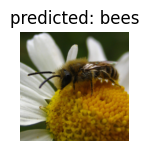

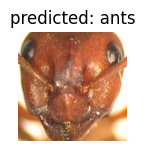

In [4]:
# (b) Using the pre-trained model as a feature extractor
print("\nUsing the pre-trained model as a feature extractor")
resnet18 = models.resnet18(pretrained=True)
# Freeze all the network except the final layer
for param in resnet18.parameters():
    param.requires_grad = False

# Modify the final layer to match the number of classes in our dataset
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, len(class_names))
resnet18 = resnet18.to(device)

criterion = nn.CrossEntropyLoss()
# Only the parameters of the final layer are being optimized
optimizer_conv = optim.SGD(resnet18.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

# Train and evaluate the model
resnet18 = train_model(resnet18, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10)

# Visualize the model predictions
visualize_model(resnet18)

The identical validation accuracy for both fine-tuning and feature extraction (96.0784%) suggests that the pre-trained ResNet-18 features are highly effective for the Hymenoptera dataset. This indicates that fine-tuning provides no significant advantage, as the model's pre-trained weights already align well with the dataset's features, demonstrating the effectiveness of transfer learning.